# Proof of Concept: General Adversarial Network

In order to show the inner-working of General Adversarial Networks, we must start extremely simple and work our way up. In this notebook, we will deviate from the normal experiments, in that we will simply demonstrate a basic GAN where a generator's weights will choose noise samples to try trick a discriminator that attempts to classify quadratic curves, generated by a simple numpy function.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def get_y(x):
    return 10 + x*x


def sample_data(n=10000, scale=100):
    data = []

    x = scale*(np.random.random_sample((n,))-0.5)

    for i in range(n):
        yi = get_y(x[i])
        data.append([x[i], yi])

    return np.array(data)

def sample_Z(batch_size, dims):
    return np.random.uniform(-1., 1., size=[batch_size, dims])

Unlike previous notebooks, we will deviate away from the tensorflow Keras API for creating the networks, as we wish to access the raw layer outputs and use their logits and feature transformation outputs for plotting later.

We define our generator as two fully connected (dense) layers of 16 nodes each with a LeakyReLU activation function and an output layer of size two, corresponding to the dimensions of the real dataset we are trying to learn. The function will take in the placeholder variable for random samples, Z.

In [2]:
def generator(Z,hsize=[16, 16],reuse=False):
    with tf.variable_scope("generator",reuse=reuse):
        h1 = tf.layers.dense(Z,hsize[0],activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu)
        out = tf.layers.dense(h2,2)

    return out

We define the discriminator in the same fashion. It is a 3 layer fully connected network, same activation functions, and takes in the placeholder for the sample vector space of the real data. It can also take in the generated samples from the generator network. The size of the third layer is fixed to 2 so we can plot the transformed feature space in a 2D plane, explained later.

The output of this function is a logit prediction for the given X and the output of the last layer (h3) which is the feature transformation learned for X. 
The logit function is the inverse of the sigmoid function, used to represent the logarithm of the odds (ratio of the probability of variable being 1 to that of it being 0).

In [3]:
def discriminator(X,hsize=[16, 16],reuse=False):
    with tf.variable_scope("discriminator",reuse=reuse):
        h1 = tf.layers.dense(X,hsize[0],activation=tf.nn.leaky_relu)
        h2 = tf.layers.dense(h1,hsize[1],activation=tf.nn.leaky_relu)
        h3 = tf.layers.dense(h2,2)
        out = tf.layers.dense(h3,1)

    return out, h3

For training, we define X and Z as placeholders for the real and generated noise data respectively.

In [4]:
X = tf.placeholder(tf.float32,[None,2])
Z = tf.placeholder(tf.float32,[None,2])

We then use the functions and placeholders defined above to generate the graph for the generator network and feed real and generated data to the discriminator network.

In [5]:
G_sample = generator(Z)
r_logits, r_h3 = discriminator(X)
f_logits, g_h3 = discriminator(G_sample,reuse=True)

Using the logits for the real and generated data we can define the loss functions for the discriminator and generator repsectively.

These losses are sigmoid cross entropy based losses using the equations we defined above. It takes as input the discriminator logits and true labels for each sample. It then calculates the error for each sample.

In [6]:
disc_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=r_logits,labels=tf.ones_like(r_logits)) + tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.zeros_like(f_logits)))
gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=f_logits,labels=tf.ones_like(f_logits)))


Next, we define optimizers for the two networks using the loss functions defined above and the scope of the layers defined in the generator and discriminator functions. We use the RMSProp optimizer for both the networks with the learning rate as 0.001.

In [7]:
gen_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="generator")
disc_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="discriminator")

gen_train_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(gen_loss,var_list = gen_vars)
disc_train_step = tf.train.RMSPropOptimizer(learning_rate=0.001).minimize(disc_loss,var_list = disc_vars)

Finally, we train each network in alternation for the required number of steps.

Iterations: 0	 Discriminator loss: 329.4671	 Generator loss: 0.7055


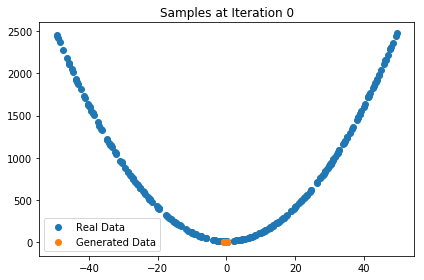

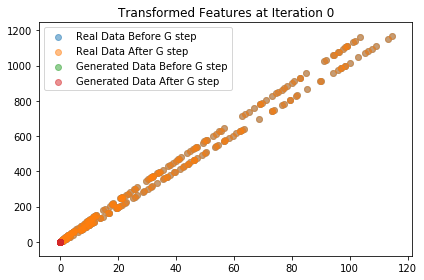

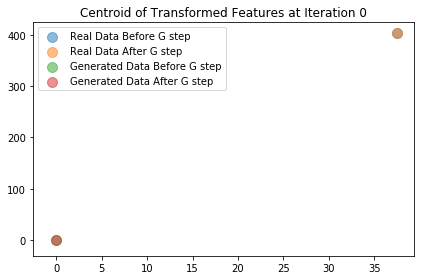

Iterations: 100	 Discriminator loss: 0.9918	 Generator loss: 1.4276
Iterations: 200	 Discriminator loss: 6.1738	 Generator loss: 5.1411
Iterations: 300	 Discriminator loss: 2.6855	 Generator loss: 0.3920
Iterations: 400	 Discriminator loss: 5.4567	 Generator loss: 0.0000
Iterations: 500	 Discriminator loss: 11.1430	 Generator loss: 1.9603
Iterations: 600	 Discriminator loss: 6.7983	 Generator loss: 1.9417
Iterations: 700	 Discriminator loss: 2.1676	 Generator loss: 0.1262
Iterations: 800	 Discriminator loss: 1.2839	 Generator loss: 3.9554
Iterations: 900	 Discriminator loss: 1.4368	 Generator loss: 2.2209
Iterations: 1000	 Discriminator loss: 1.2802	 Generator loss: 0.9361


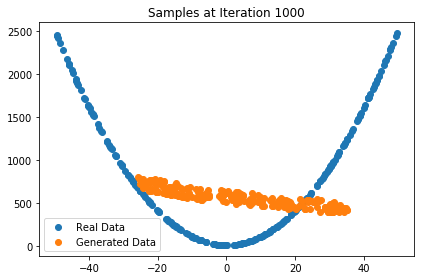

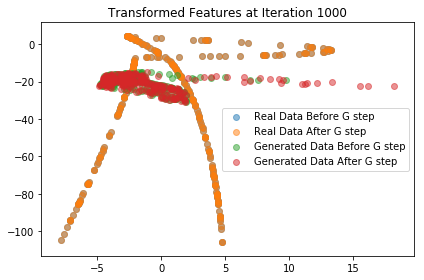

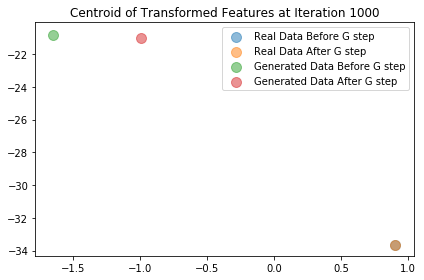

Iterations: 1100	 Discriminator loss: 1.3328	 Generator loss: 0.9188
Iterations: 1200	 Discriminator loss: 1.2571	 Generator loss: 0.9699
Iterations: 1300	 Discriminator loss: 1.2058	 Generator loss: 1.0258
Iterations: 1400	 Discriminator loss: 1.2709	 Generator loss: 0.9585
Iterations: 1500	 Discriminator loss: 1.3099	 Generator loss: 1.0484
Iterations: 1600	 Discriminator loss: 1.1632	 Generator loss: 1.2447
Iterations: 1700	 Discriminator loss: 1.0562	 Generator loss: 0.8901
Iterations: 1800	 Discriminator loss: 1.2136	 Generator loss: 0.8037
Iterations: 1900	 Discriminator loss: 1.2398	 Generator loss: 0.7551
Iterations: 2000	 Discriminator loss: 1.2508	 Generator loss: 0.7756


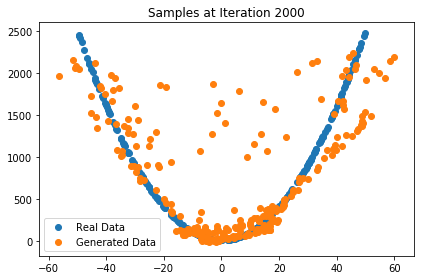

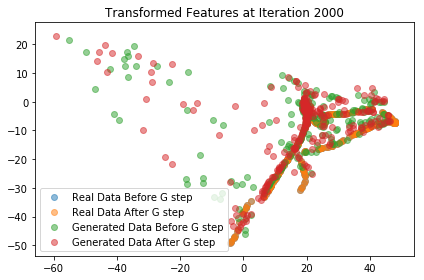

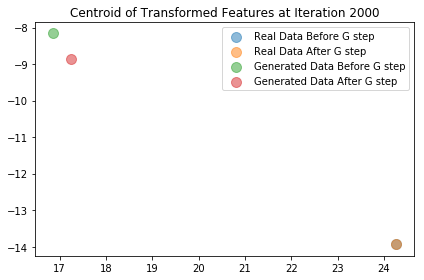

Iterations: 2100	 Discriminator loss: 1.2847	 Generator loss: 0.7479
Iterations: 2200	 Discriminator loss: 1.2647	 Generator loss: 0.7987
Iterations: 2300	 Discriminator loss: 1.2936	 Generator loss: 0.5976
Iterations: 2400	 Discriminator loss: 1.2646	 Generator loss: 0.7959
Iterations: 2500	 Discriminator loss: 1.2124	 Generator loss: 0.8637
Iterations: 2600	 Discriminator loss: 1.3176	 Generator loss: 1.0944
Iterations: 2700	 Discriminator loss: 1.3869	 Generator loss: 0.6469
Iterations: 2800	 Discriminator loss: 1.2517	 Generator loss: 0.7117
Iterations: 2900	 Discriminator loss: 1.2651	 Generator loss: 0.7088
Iterations: 3000	 Discriminator loss: 1.4141	 Generator loss: 0.8668


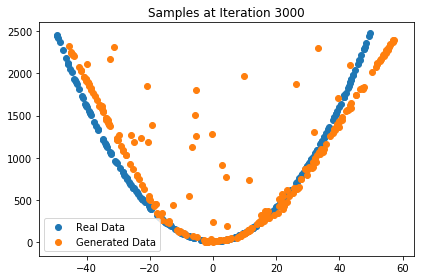

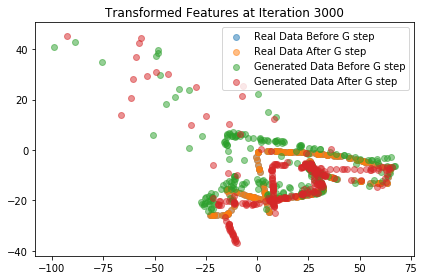

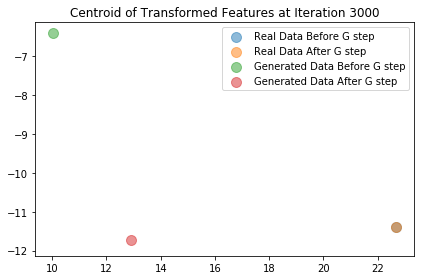

Iterations: 3100	 Discriminator loss: 1.2996	 Generator loss: 0.6047
Iterations: 3200	 Discriminator loss: 1.3252	 Generator loss: 0.4536
Iterations: 3300	 Discriminator loss: 1.2062	 Generator loss: 0.8192
Iterations: 3400	 Discriminator loss: 1.2371	 Generator loss: 0.7412
Iterations: 3500	 Discriminator loss: 1.3005	 Generator loss: 0.7831
Iterations: 3600	 Discriminator loss: 1.3865	 Generator loss: 0.6603
Iterations: 3700	 Discriminator loss: 1.1109	 Generator loss: 0.5467
Iterations: 3800	 Discriminator loss: 1.3502	 Generator loss: 1.0431
Iterations: 3900	 Discriminator loss: 1.3272	 Generator loss: 0.6595
Iterations: 4000	 Discriminator loss: 1.1847	 Generator loss: 0.5314


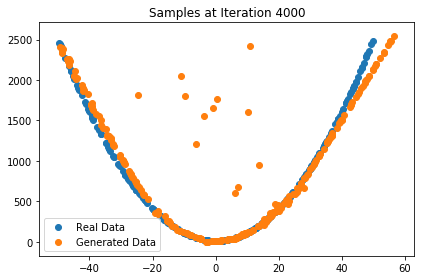

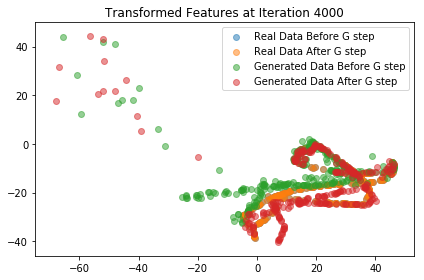

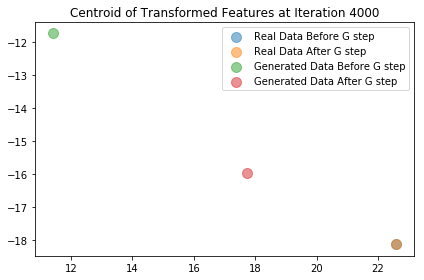

Iterations: 4100	 Discriminator loss: 1.2892	 Generator loss: 0.9502
Iterations: 4200	 Discriminator loss: 1.2652	 Generator loss: 0.8615
Iterations: 4300	 Discriminator loss: 1.2010	 Generator loss: 0.5943
Iterations: 4400	 Discriminator loss: 1.2719	 Generator loss: 0.8673
Iterations: 4500	 Discriminator loss: 1.2557	 Generator loss: 0.6695
Iterations: 4600	 Discriminator loss: 1.3507	 Generator loss: 0.6155
Iterations: 4700	 Discriminator loss: 1.2323	 Generator loss: 0.7890
Iterations: 4800	 Discriminator loss: 1.2274	 Generator loss: 0.7442
Iterations: 4900	 Discriminator loss: 1.4069	 Generator loss: 0.9006
Iterations: 5000	 Discriminator loss: 1.2990	 Generator loss: 0.7458


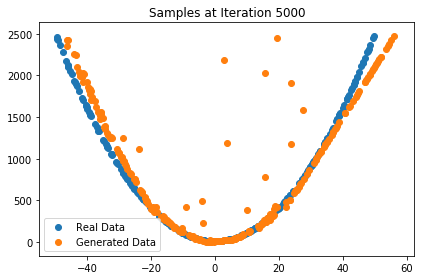

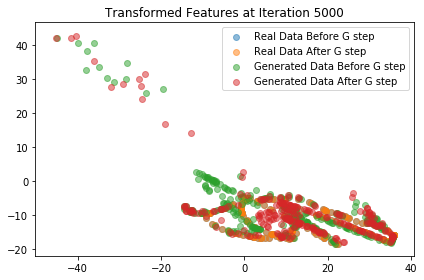

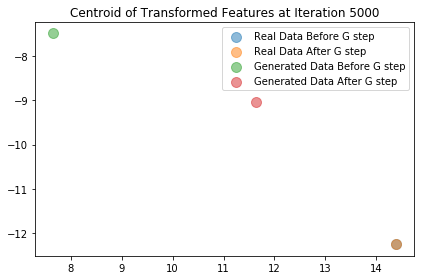

Iterations: 5100	 Discriminator loss: 1.3142	 Generator loss: 0.6694
Iterations: 5200	 Discriminator loss: 1.3466	 Generator loss: 0.5784
Iterations: 5300	 Discriminator loss: 1.2872	 Generator loss: 0.7717
Iterations: 5400	 Discriminator loss: 1.2629	 Generator loss: 1.0371
Iterations: 5500	 Discriminator loss: 1.2445	 Generator loss: 0.7755
Iterations: 5600	 Discriminator loss: 1.2611	 Generator loss: 0.6810
Iterations: 5700	 Discriminator loss: 1.2647	 Generator loss: 0.6782
Iterations: 5800	 Discriminator loss: 1.3151	 Generator loss: 0.7627
Iterations: 5900	 Discriminator loss: 1.3192	 Generator loss: 0.7686
Iterations: 6000	 Discriminator loss: 1.2946	 Generator loss: 0.7737


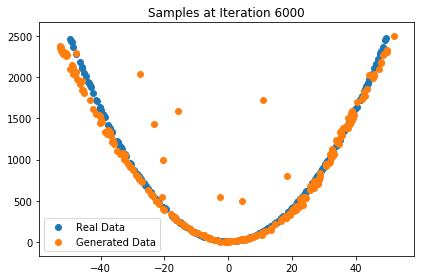

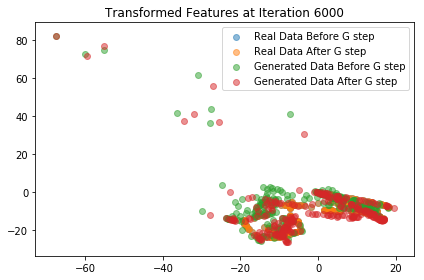

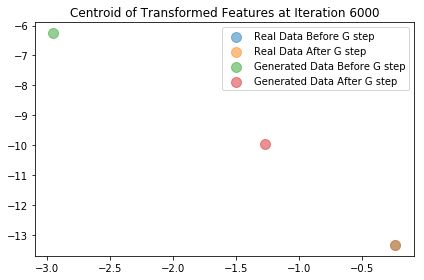

Iterations: 6100	 Discriminator loss: 1.2464	 Generator loss: 0.7633
Iterations: 6200	 Discriminator loss: 1.3187	 Generator loss: 0.8922
Iterations: 6300	 Discriminator loss: 1.2935	 Generator loss: 0.8388
Iterations: 6400	 Discriminator loss: 1.3570	 Generator loss: 0.6066
Iterations: 6500	 Discriminator loss: 1.3798	 Generator loss: 0.7660
Iterations: 6600	 Discriminator loss: 1.2731	 Generator loss: 0.5090
Iterations: 6700	 Discriminator loss: 1.4500	 Generator loss: 0.8045
Iterations: 6800	 Discriminator loss: 1.3772	 Generator loss: 0.9271
Iterations: 6900	 Discriminator loss: 1.2751	 Generator loss: 0.6812
Iterations: 7000	 Discriminator loss: 1.1955	 Generator loss: 0.6728


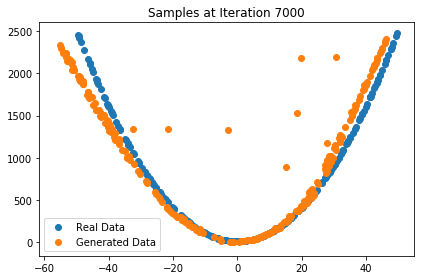

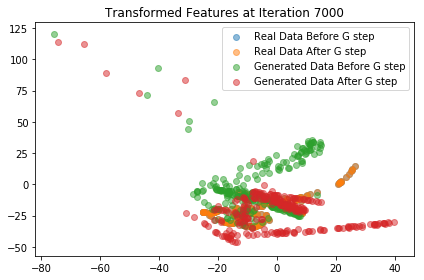

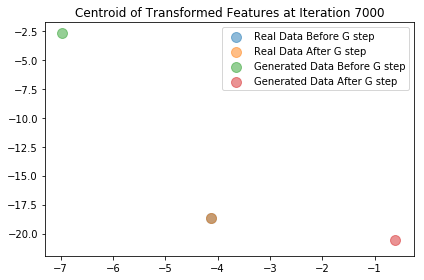

Iterations: 7100	 Discriminator loss: 1.1944	 Generator loss: 0.6836
Iterations: 7200	 Discriminator loss: 1.1974	 Generator loss: 0.6923
Iterations: 7300	 Discriminator loss: 1.2527	 Generator loss: 0.6441
Iterations: 7400	 Discriminator loss: 1.3309	 Generator loss: 0.7168
Iterations: 7500	 Discriminator loss: 1.3259	 Generator loss: 0.6711
Iterations: 7600	 Discriminator loss: 1.2670	 Generator loss: 0.7759
Iterations: 7700	 Discriminator loss: 1.3281	 Generator loss: 0.7433
Iterations: 7800	 Discriminator loss: 1.4172	 Generator loss: 0.6091
Iterations: 7900	 Discriminator loss: 1.3399	 Generator loss: 0.8587
Iterations: 8000	 Discriminator loss: 1.2876	 Generator loss: 0.7930


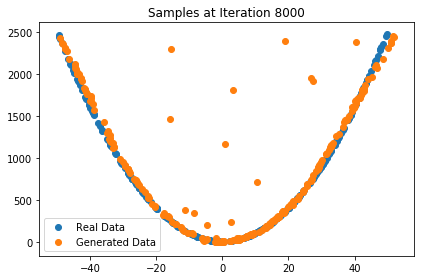

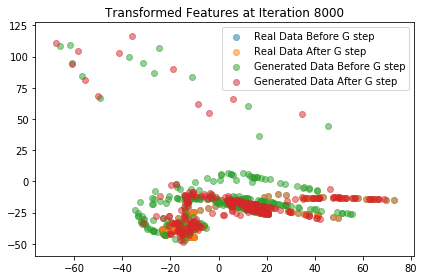

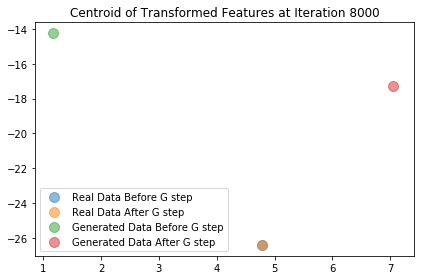

Iterations: 8100	 Discriminator loss: 1.3289	 Generator loss: 0.9360
Iterations: 8200	 Discriminator loss: 1.2505	 Generator loss: 0.6685
Iterations: 8300	 Discriminator loss: 1.3531	 Generator loss: 0.6207
Iterations: 8400	 Discriminator loss: 1.4048	 Generator loss: 0.5956
Iterations: 8500	 Discriminator loss: 1.2875	 Generator loss: 0.5706
Iterations: 8600	 Discriminator loss: 1.1449	 Generator loss: 0.5927
Iterations: 8700	 Discriminator loss: 1.1928	 Generator loss: 0.6642
Iterations: 8800	 Discriminator loss: 1.2387	 Generator loss: 0.8417
Iterations: 8900	 Discriminator loss: 1.2781	 Generator loss: 0.6993
Iterations: 9000	 Discriminator loss: 1.3005	 Generator loss: 0.7849


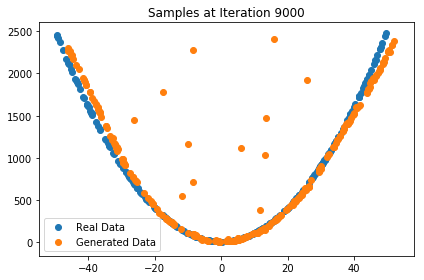

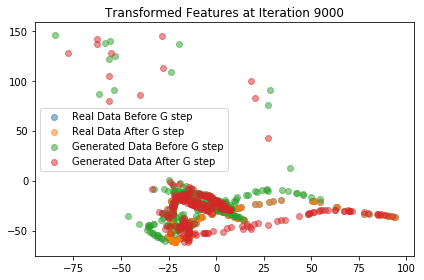

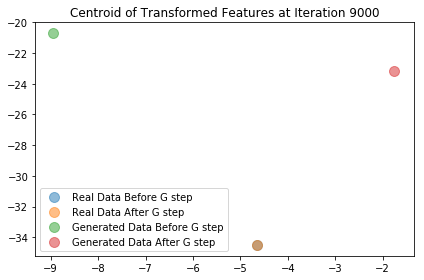

Iterations: 9100	 Discriminator loss: 1.3083	 Generator loss: 0.9040
Iterations: 9200	 Discriminator loss: 1.2683	 Generator loss: 0.5742
Iterations: 9300	 Discriminator loss: 1.4204	 Generator loss: 0.9286
Iterations: 9400	 Discriminator loss: 1.3323	 Generator loss: 0.7935
Iterations: 9500	 Discriminator loss: 1.2942	 Generator loss: 0.8342
Iterations: 9600	 Discriminator loss: 1.2790	 Generator loss: 0.6684
Iterations: 9700	 Discriminator loss: 1.3215	 Generator loss: 0.6900
Iterations: 9800	 Discriminator loss: 1.4517	 Generator loss: 0.8906
Iterations: 9900	 Discriminator loss: 1.3119	 Generator loss: 0.6541
Iterations: 10000	 Discriminator loss: 1.6963	 Generator loss: 0.7156


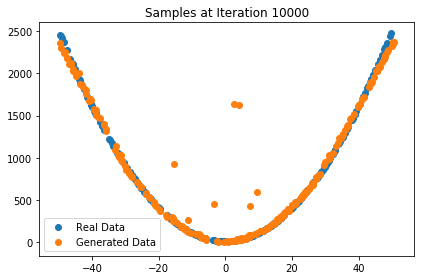

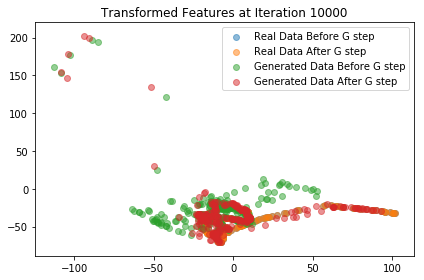

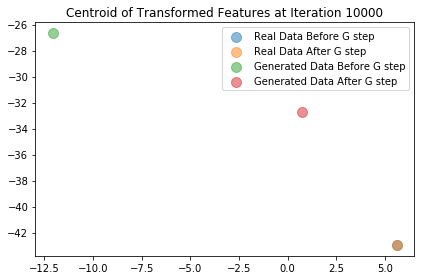

In [8]:
sess = tf.Session()
tf.global_variables_initializer().run(session=sess)

batch_size = 256
discriminator_steps = 10
generator_steps = 10

x_plot = sample_data(n=batch_size)

for i in range(10001):
    X_batch = sample_data(n=batch_size)
    Z_batch = sample_Z(batch_size, 2)

    for _ in range(discriminator_steps):
        _, d_loss = sess.run([disc_train_step, disc_loss], feed_dict={X: X_batch, Z: Z_batch})
    
    rh3_dstep, gh3_dstep = sess.run([r_h3, g_h3], feed_dict={X: X_batch, Z: Z_batch})

    for _ in range(generator_steps):
        _, g_loss = sess.run([gen_train_step, gen_loss], feed_dict={Z: Z_batch})

    rh3_gstep, gh3_gstep = sess.run([r_h3, g_h3], feed_dict={X: X_batch, Z: Z_batch})

    if i % 100 == 0:
        print("Iterations: %d\t Discriminator loss: %.4f\t Generator loss: %.4f"%(i,d_loss,g_loss))
    
    if i%1000 == 0:
        plt.figure()
        g_plot = sess.run(G_sample, feed_dict={Z: Z_batch})
        xax = plt.scatter(x_plot[:,0], x_plot[:,1])
        gax = plt.scatter(g_plot[:,0],g_plot[:,1])

        plt.legend((xax,gax), ("Real Data","Generated Data"))
        plt.title('Samples at Iteration %d'%i)
        plt.tight_layout()
        plt.show()
        plt.close()

        plt.figure()
        rrd = plt.scatter(rh3_dstep[:,0], rh3_dstep[:,1], alpha=0.5)
        rrg = plt.scatter(rh3_gstep[:,0], rh3_gstep[:,1], alpha=0.5)
        grd = plt.scatter(gh3_dstep[:,0], gh3_dstep[:,1], alpha=0.5)
        grg = plt.scatter(gh3_gstep[:,0], gh3_gstep[:,1], alpha=0.5)


        plt.legend((rrd, rrg, grd, grg), ("Real Data Before G step","Real Data After G step",
                               "Generated Data Before G step","Generated Data After G step"))
        plt.title('Transformed Features at Iteration %d'%i)
        plt.tight_layout()
        plt.show()
        plt.close()
        plt.figure()

        rrdc = plt.scatter(np.mean(rh3_dstep[:,0]), np.mean(rh3_dstep[:,1]),s=100, alpha=0.5)
        rrgc = plt.scatter(np.mean(rh3_gstep[:,0]), np.mean(rh3_gstep[:,1]),s=100, alpha=0.5)
        grdc = plt.scatter(np.mean(gh3_dstep[:,0]), np.mean(gh3_dstep[:,1]),s=100, alpha=0.5)
        grgc = plt.scatter(np.mean(gh3_gstep[:,0]), np.mean(gh3_gstep[:,1]),s=100, alpha=0.5)

        plt.legend((rrdc, rrgc, grdc, grgc), ("Real Data Before G step","Real Data After G step",
                               "Generated Data Before G step","Generated Data After G step"))

        plt.title('Centroid of Transformed Features at Iteration %d'%i)
        plt.tight_layout()
        plt.show()
        plt.close()

Here we plot the real and generated data produced every 1000 steps to see what the generator is actually learning to do. We also plot the feature transformations that come directly from the discriminators third layer, before and after the generator step, in order to see the feature transformation function that the discriminator uses to seperate the real and fake data. We can gain multiple insights from these graphs:

- Obviously, the real data does not get transformed, so the data points coincide before and after.

- The centroid shows us that the generated data features will almost always move towards the centroid of the real data.

- We can see that as training continues the transformed features of the fake and real data start to mingle. This happens as the discriminator becomes less sure of it's decisions. At the end of the training, the real and fake data feature transformation should coincide.

These graphs are awesome because we can see that the generator, after generating pretty much random noise after 1000 training iterations, begins to make quadratic-looking graphs after 4000 more, and by the end is almost perfect. The GAN at this stage 'understands' the task we wish it to. 

Applied to text-based tasks, which is incredibly more complex but fullfilling, can give us extremely valuable insights into the nature of fake reviews and the features that can be taken advantage to improve our discriminator much more.

Going forward, here are some suggested modifications that can be made to augment the GAN for different tasks:

- Complexity (# of layers and/or # of units) of the neural network if the data-set is more complex.
- Changing how many iterations of generator should be run for every iteration of discriminator (This is not advised although it works in some specific use cases)
- Changing the learning rate and optimizer.
- Adding noise to the inputs
- Changing batch size
- Changing latent dimension